In [1]:
%run func_def.ipynb

imports loaded.
get_height(item)
get_weight(item)
get_reach(item)
get_std_reach(item, height, reach_list, height_list)
get_age(item)
get_std_age(item, age_list)
get_win_perc(name, date, df)
get_lose_streak_data_frame(name, date, df)
get_win_streak_data_frame(name, date, df)
get_streak_data_frame(name, date, df)
get_win_streak(name, date, df)
get_lose_streak(name, date, df)
get_fighter_stats(name, data )
add_columns(data, column_list)
get_stat(index, data, stat='height', fo='')
get_swaped_row(index, data)
get_wins(combo, data)
get_wins_ratio(combo, data)
get_r_score(X, y)
get_sig_features(data, sig_r)
set_train_test(X_columns, y_columns, data, test_size=0.3, valid_size=0.3)
set_knn_reg(X_columns, y_columns, data, n=10)
set_predictions(model, data, X_columns, y_columns)
get_rmse(act, pred)
set_desicion_tree_clf(X_columns, y_columns, data, tree_depth)
set_forest_clf(X_columns, y_columns, n_estimators, tree_depth, data)
get_accuracy(act, pred)
get_fighters_stats(fighter, opponent, data)


### <span style='color:green'> **[done]** </span>Loading Features data

In [45]:
loc = '../data/'
file = 'ufc_data_features.csv'
df = pd.read_csv(loc+file)
df = df[df.columns[1:]]
df.tail(3)

,result,fighter,opponent,date,weight class,method,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
6790,lose,Kailin Curran,Aleksandra Albu,2017-07-29,Women's Strawweight,U-DEC:,-0.000995,0.126491,-1.597572,-0.013366,-0.159903,0.226867,-0.572982,0.195941,-0.626083,-0.350298,-0.477706,1.235656,-0.160261,-2.063384,-0.575708,2.156259
6791,win,Jarred Brooks,Eric Shelton,2017-07-29,Flyweight,S-DEC:,-0.000995,-0.174504,1.558550,-0.013366,0.941938,0.191864,0.734104,0.386715,-0.317445,0.299038,-0.118606,-0.111192,2.207079,-0.016271,-0.004540,-1.072901
6792,win,Drew Dober,Joshua Burkman,2017-07-29,Lightweight,KO/TKO:Punch,1.351338,0.126491,-0.019511,-0.013366,-1.000196,-0.683207,-0.640012,-0.185607,1.087173,-0.269131,0.642198,-0.027014,1.461511,0.111674,-0.004540,-2.149288


In [46]:
req_data = ['fighter','opponent']
y = ['result']
X = ['td avg._dif',
     'td acc._dif',
     'td def._dif',
     'sub. avg._dif',
     'slpm_dif',
     'str. acc._dif',
     'sapm_dif',
     'str. def_dif',
     'stance_win_ratio',
     'win_perc_dif',
     'win_strk_dif',
     'lose_strk_dif']
df = df[req_data + y + X]
df.head(3)

,fighter,opponent,result,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
0,Tai Tuivasa,Ciryl Gane,lose,-0.354673,-0.753213,-0.137287,-0.471767,-0.657577,-0.756132,1.226495,-1.458041,1.461511,-0.400105,2.851303,-1.072901
1,Robert Whittaker,Marvin Vettori,win,-0.605091,-0.263173,0.298409,-0.567154,0.142363,-0.187964,-0.179470,0.141342,-1.407755,0.111674,-0.575708,1.079872
2,Joaquin Buckley,Nassourdine Imavov,lose,0.212942,0.226867,-0.371892,-2.284120,-0.330043,-1.811303,0.617852,-0.700439,1.461511,-0.118627,0.566629,0.003486


In [47]:
df = set_train_test(X_columns=X, y_columns=y, data=df, test_size=0.3, valid_size=0.3)
knn_reg = set_knn_reg(X_columns=X, y_columns=y, data=df, n=5)
df = set_predictions(model=knn_reg, data=df, X_columns=X, y_columns=y) ######
knn_reg

Data split: Data=(6793, 16), train_set=(3344, 12), validation_set=(1350, 12), test_set=(2099, 12)


TypeError: unsupported operand type(s) for /: 'str' and 'int'

### <span style='color:green'> **[done]** </span> X = Feature definition:

In [3]:
X = df.columns[10:len(df.columns)-1]
X

Index(['td avg._dif', 'td acc._dif', 'td def._dif', 'sub. avg._dif',
       'slpm_dif', 'str. acc._dif', 'sapm_dif', 'str. def_dif',
       'stance_win_ratio', 'win_perc_dif', 'win_strk_dif'],
      dtype='object')

## <span style='color:green'> **[done]** </span> Clean(if needed) outliers for more accurate model


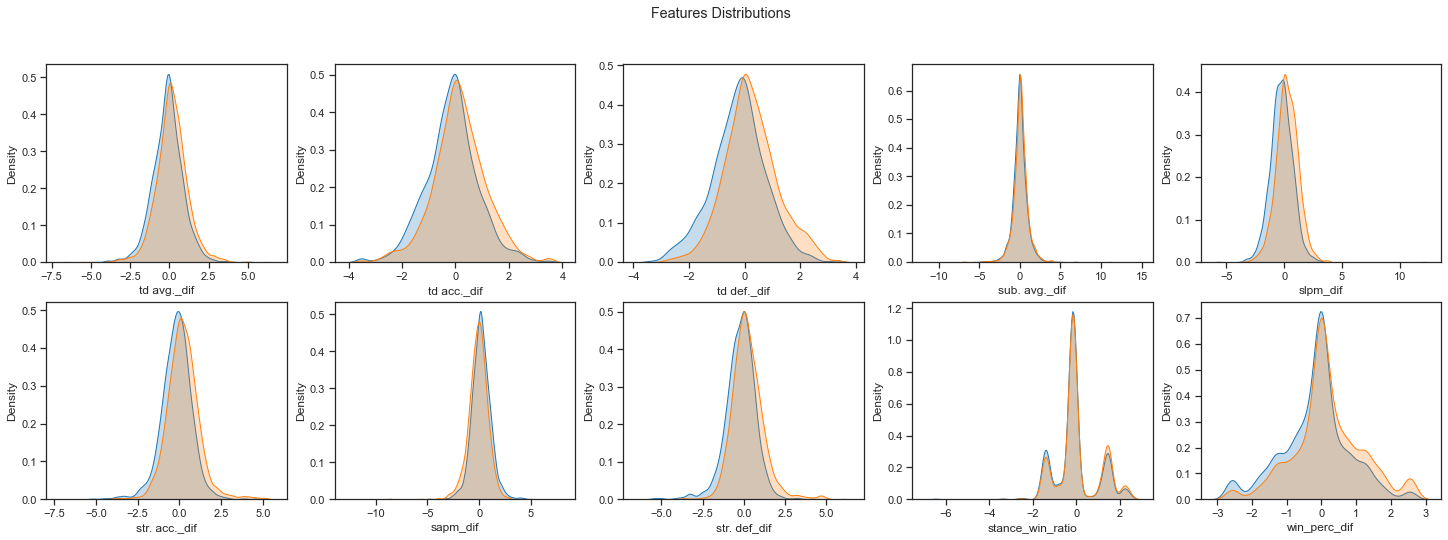

In [4]:
rows= 2
cols= int(len(X)/2)
fig, axs = plt.subplots(rows,cols,figsize = (25,8))
fig.suptitle('Features Distributions')

for i in range(0,cols):
    sns.kdeplot(ax=axs[0,i], data=df[df.result == 'lose'], x=X[i], fill=True)
    sns.kdeplot(ax=axs[0,i], data=df[df.result == 'win'], x=X[i], fill=True)

for i in range(0,cols):
    sns.kdeplot(ax=axs[1,i], data=df[df.result == 'lose'], x=X[i+cols], fill=True)
    sns.kdeplot(ax=axs[1,i], data=df[df.result == 'win'], x=X[i+cols], fill=True)

for the most part fighter's sklill are similar when they meet in the octagon = not many outlier ( > 3 sigma data points).
i will clear any > 3 sigma data points

In [5]:
original_size = len(df)

for feature in X:
    df = df[df[feature] <= 3]
    
print('Rows deleted: %d' %(original_size-len(df)))

Rows deleted: 303


### <span style='color:green'> **[done]** </span> EDA for predicting 'kd_dif', 'str_dif', 'td_dif', 'sub_dif' (=fight statistics)
all features are normalized > only correlated features will be included in finale model

str_dif correlation:


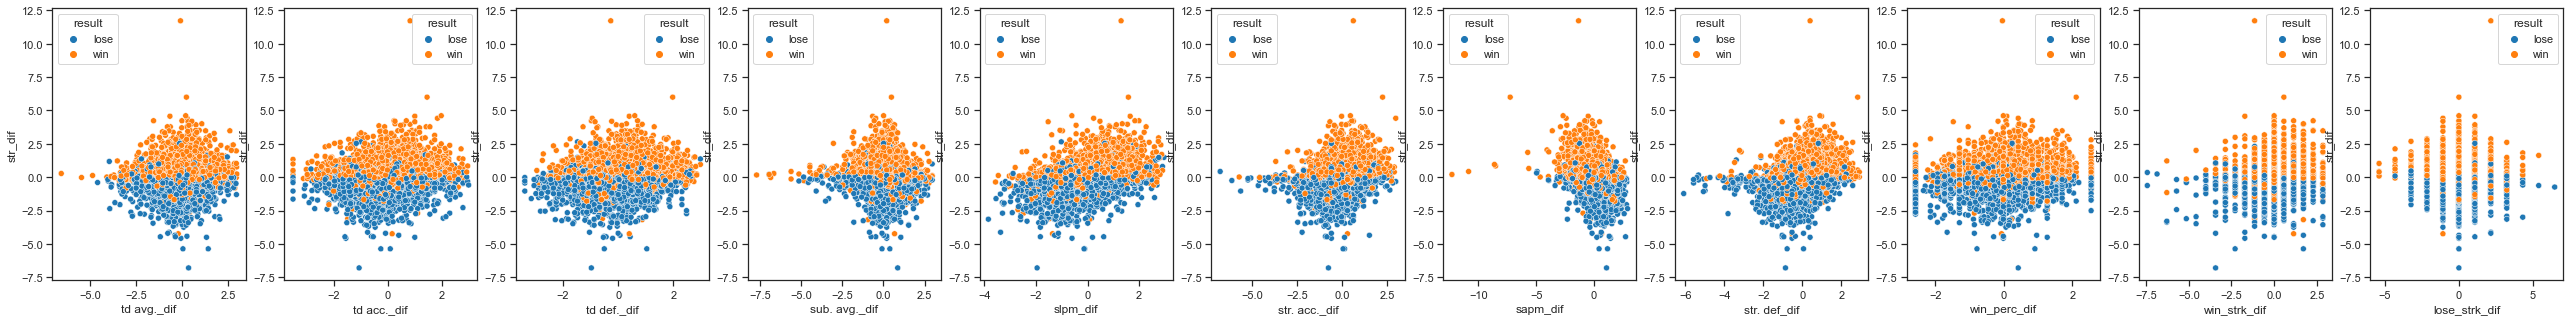

In [6]:
features = ['result','str_dif','td avg._dif','td acc._dif',
            'td def._dif','sub. avg._dif','slpm_dif','str. acc._dif',
            'sapm_dif','str. def_dif','win_perc_dif','win_strk_dif','lose_strk_dif']
rows = 1
cols = len(features)-2
fig, axs = plt.subplots(rows,cols,figsize = (45,5))
print('str_dif correlation:')

for i,column in zip(range(0,len(features)),features[2:]):
    sns.scatterplot(ax=axs[i],y='str_dif',x=column,data=df,hue='result')

kd_dif correlation:


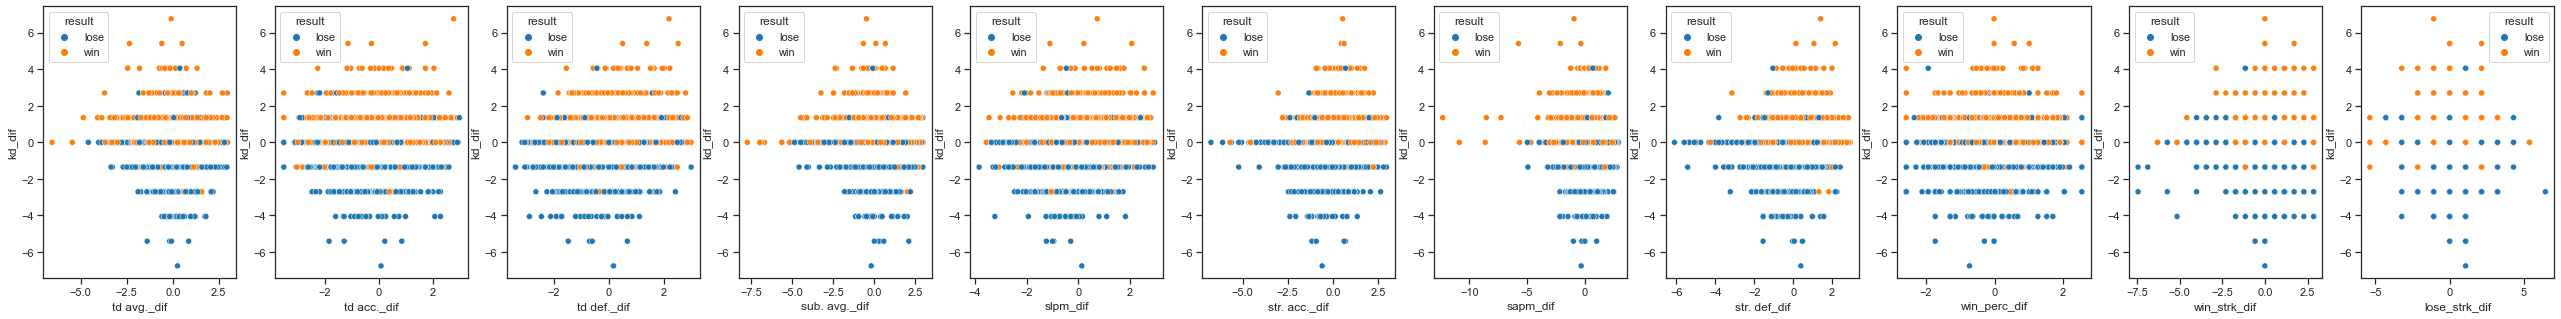

In [7]:
features = ['result','kd_dif','td avg._dif','td acc._dif',
            'td def._dif','sub. avg._dif','slpm_dif','str. acc._dif',
            'sapm_dif','str. def_dif','win_perc_dif','win_strk_dif','lose_strk_dif']
rows = 1
cols = len(features)-2
fig, axs = plt.subplots(rows,cols,figsize = (45,5))
print('kd_dif correlation:')

for i,column in zip(range(0,len(features)),features[2:]):
    sns.scatterplot(ax=axs[i],y='kd_dif',x=column,data=df,hue='result')

td_dif correlation:


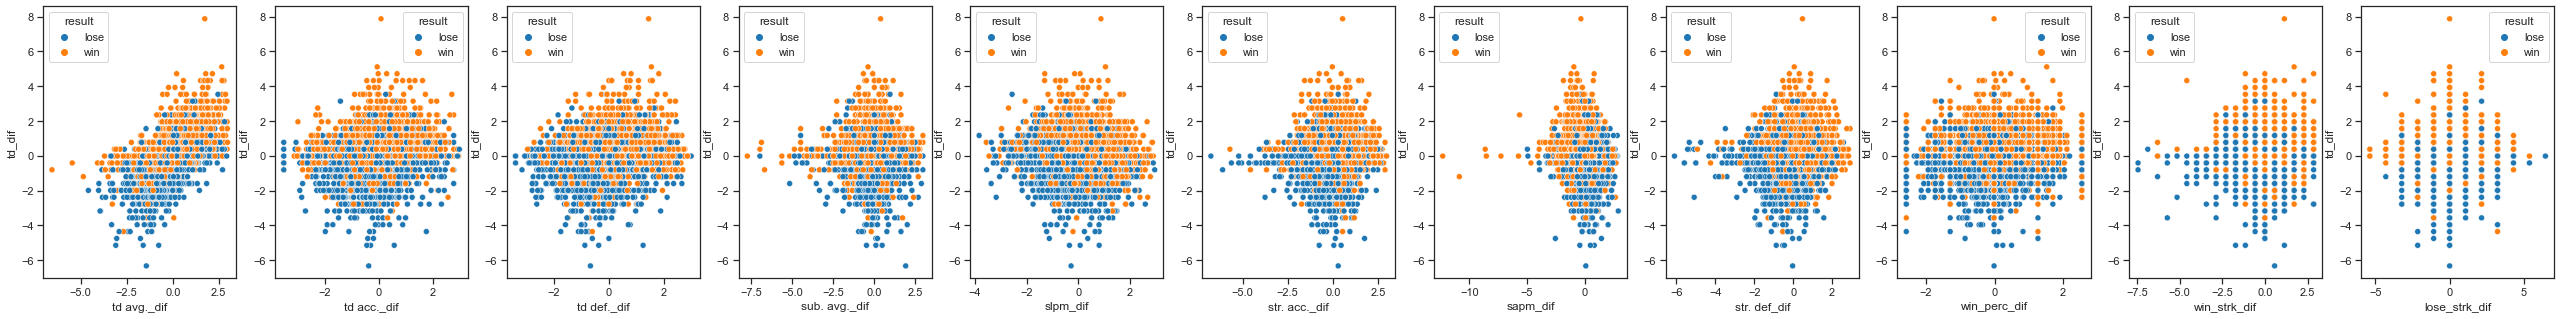

In [8]:
features = ['result','td_dif','td avg._dif','td acc._dif',
            'td def._dif','sub. avg._dif','slpm_dif','str. acc._dif',
            'sapm_dif','str. def_dif','win_perc_dif','win_strk_dif','lose_strk_dif']
rows = 1
cols = len(features)-2
fig, axs = plt.subplots(rows,cols,figsize = (45,5))
print('td_dif correlation:')

for i,column in zip(range(0,len(features)),features[2:]):
    sns.scatterplot(ax=axs[i],y='td_dif',x=column,data=df,hue='result')

only ['td avg._dif','td def._dif','str. acc._dif'] have correlation to td_dif  = will include as feature

sub_dif correlation:


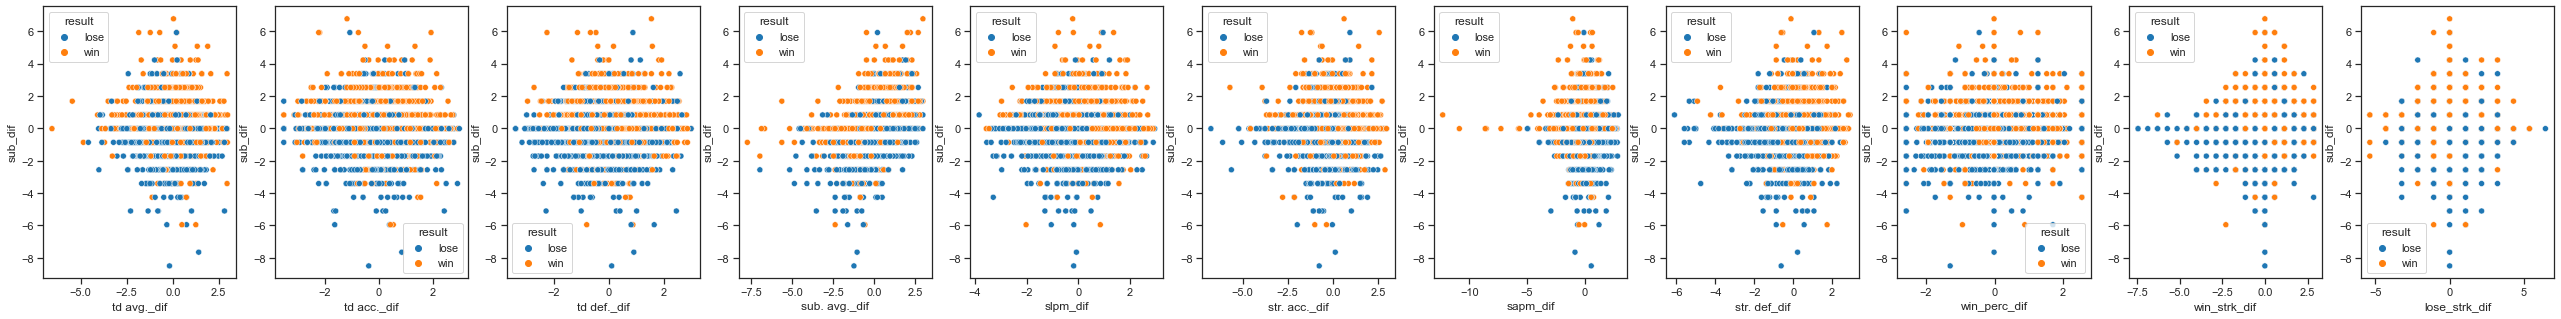

In [9]:
features = ['result','sub_dif','td avg._dif','td acc._dif',
            'td def._dif','sub. avg._dif','slpm_dif','str. acc._dif',
            'sapm_dif','str. def_dif','win_perc_dif','win_strk_dif','lose_strk_dif']
rows = 1
cols = len(features)-2
fig, axs = plt.subplots(rows,cols,figsize = (45,5))
print('sub_dif correlation:')

for i,column in zip(range(0,len(features)),features[2:]):
    sns.scatterplot(ax=axs[i],y='sub_dif',x=column,data=df,hue='result')

### <span style='color:green'> [done] </span> Correlations Report:

---------------------------------------------
Correlation Report: Most significant features
---------------------------------------------
R coef > Median R: [0.42, 0.26, 0.32, 0.29, 0.57, 0.38]
Most significant: ['sapm_dif', 'slpm_dif', 'str. acc._dif', 'str. def_dif', 'sub. avg._dif', 'td avg._dif']


y,kd_dif,str_dif,sub_dif,td_dif
X,,,,
lose_strk_dif,0.05,0.04,0.0,0.01
sapm_dif,0.04,0.32,0.01,0.14
slpm_dif,0.16,0.42,0.03,0.05
str. acc._dif,0.11,0.26,0.03,0.07
str. def_dif,0.08,0.29,0.05,0.11
sub. avg._dif,0.07,0.05,0.38,0.04
sub_dif,0.02,0.06,1.0,0.06
td acc._dif,0.05,0.13,0.01,0.18
td avg._dif,0.08,0.07,0.03,0.57


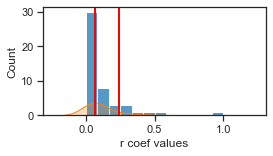

In [10]:
rdf = pd.DataFrame(columns=['y','X','r_coef'])
r_list = []
y_columns = ['kd_dif','str_dif','td_dif','sub_dif']
i = 0 
for y_column in y_columns:
    for x_column in features[1:]:
        rdf.loc[i, 'X'] = x_column
        rdf.loc[i, 'y'] = y_column
        rdf.loc[i, 'r_coef'] = np.round(np.abs(get_r_score(X=df[x_column], y=df[y_column])),2)
        r_list.append(rdf.loc[i, 'r_coef'])
        i += 1

rdf = rdf.pivot('X','y','r_coef')
print('---------------------------------------------')
print('Correlation Report: Most significant features')
print('---------------------------------------------')

sig_r =  [r for r in r_list if (r > (np.median(r_list)+np.std(r_list)) and r < 1)]
sig_features = get_sig_features(data=rdf, sig_r=sig_r)
print('R coef > Median R: %s' %(sig_r))
print('Most significant: %s' %(sig_features) )

g = plt.figure(figsize=(4,2))
g = sns.histplot(x = r_list, bins=len(rdf))
g = sns.kdeplot(x = r_list, fill=True)
plt.axvline(x = np.median(r_list)+np.std(r_list), color='red')
plt.axvline(x = np.median(r_list), color='red')
plt.xlabel("r coef values")
plt.ylabel("Count")

rdf

features with R coef > red line is significant enough to be included

In [11]:
X_columns = sig_features
X_columns

['sapm_dif',
 'slpm_dif',
 'str. acc._dif',
 'str. def_dif',
 'sub. avg._dif',
 'td avg._dif']

In [12]:
fdf = (df[X_columns]).copy()
for y_column in ['kd_dif','str_dif','td_dif','sub_dif']:
    fdf[y_column] = df[y_column]

fdf['fighter'] = df['fighter']
fdf['opponent'] = df['opponent']
fdf['result'] = df['result']
fdf = (fdf.dropna()).reset_index(drop=True)
fdf.head()

,sapm_dif,slpm_dif,str. acc._dif,str. def_dif,sub. avg._dif,td avg._dif,kd_dif,str_dif,td_dif,sub_dif,fighter,opponent,result
0,1.226495,-0.657577,-0.756132,-1.458041,-0.471767,-0.354673,-0.000995,-3.071582,-0.019511,-0.013366,Tai Tuivasa,Ciryl Gane,lose
1,-0.179470,0.142363,-0.187964,0.141342,-0.567154,-0.605091,-0.000995,1.518593,0.375004,-0.013366,Robert Whittaker,Marvin Vettori,win
2,0.617852,-0.330043,-1.811303,-0.700439,-2.284120,0.212942,-0.000995,-0.212129,-0.808541,-1.710673,Joaquin Buckley,Nassourdine Imavov,lose
3,-0.209903,-0.109587,-0.431465,0.057164,0.005167,0.596917,-1.353328,-0.776494,-0.019511,-0.013366,Alessio Di Chirico,Roman Kopylov,lose
4,-0.471619,0.469897,0.623706,0.646410,-0.948702,1.659805,-0.000995,0.427486,1.164035,-0.862020,William Gomis,Jarno Errens,win


In [13]:
X = fdf[X_columns]
y_columns = fdf.columns[fdf.columns.get_loc('kd_dif'):fdf.columns.get_loc('kd_dif')+4]
y = fdf[y_columns]

print('X = ' + str(X_columns))
print('y = '+ str(y_columns))

X = ['sapm_dif', 'slpm_dif', 'str. acc._dif', 'str. def_dif', 'sub. avg._dif', 'td avg._dif']
y = Index(['kd_dif', 'str_dif', 'td_dif', 'sub_dif'], dtype='object')


### <span style='color:green'> **[done]** </span> Splitting data to Training set/Test set/Validation:

### <span style='color:green'> **[done]** </span> Predicting Fight stats:

#### <span style='color:green'> **[done]** </span> Train KNN Classifier:

In [14]:
data =fdf
fdf = set_train_test(X_columns=X_columns, y_columns=y_columns, data=data, test_size=0.3, valid_size=0.1)
knn_reg = set_knn_reg(X_columns=X_columns, y_columns=y_columns, data=data, n=5)
fdf = set_predictions(model=knn_reg, data=data, X_columns=X_columns, y_columns=y_columns)
knn_reg
fdf.tail(3)

Data split: Data=(6490, 14), train_set=(4076, 6), validation_set=(461, 6), test_set=(1953, 6)


,set,sapm_dif,slpm_dif,str. acc._dif,str. def_dif,sub. avg._dif,td avg._dif,kd_dif,str_dif,td_dif,sub_dif,fighter,opponent,result,kd_dif_pred,str_dif_pred,td_dif_pred,sub_dif_pred
6487,train,-0.477706,-0.626083,-0.350298,1.235656,0.195941,-0.159903,-0.000995,0.126491,-1.597572,-0.013366,Kailin Curran,Aleksandra Albu,lose,-0.812395,-0.812395,-0.812395,-0.812395
6488,train,-0.118606,-0.317445,0.299038,-0.111192,0.386715,0.941938,-0.000995,-0.174504,1.558550,-0.013366,Jarred Brooks,Eric Shelton,win,-0.000995,-0.000995,-0.000995,-0.000995
6489,train,0.642198,1.087173,-0.269131,-0.027014,-0.185607,-1.000196,1.351338,0.126491,-0.019511,-0.013366,Drew Dober,Joshua Burkman,win,-0.000995,-0.000995,-0.000995,-0.000995


## <span style='color:green'> **[done]** </span> Tune Model parameters:

In [15]:
traindf = pd.DataFrame(columns=['neighbors','rmse','kd_dif_rmse','str_dif_rmse','td_dif_rmse','sub_dif_rmse'])
fdf = set_train_test(X_columns=X_columns, y_columns=y_columns, data=fdf, test_size=0.3, valid_size=0.1)

for n in np.arange(1,50,5):
    index = len(traindf)
    traindf.loc[index, 'neighbors'] = n
    
    knn_reg = set_knn_reg(X_columns=X_columns, y_columns=y_columns, data=fdf, n=n)
    fdf = set_predictions(model=knn_reg, data=fdf, X_columns=X_columns, y_columns=y_columns)
    
    for stat in y_columns:
        y_val_act = fdf[stat][fdf.set=='validation']
        y_val_pred = fdf[stat+'_pred'][fdf.set=='validation']
        traindf.loc[index, stat+'_rmse'] = get_rmse(act=y_val_act, pred=y_val_pred)

    traindf.loc[index,'rmse'] = 0.25 * (traindf.loc[index,'kd_dif_rmse'] + traindf.loc[index,'str_dif_rmse'] + traindf.loc[index,'td_dif_rmse'] + traindf.loc[index,'sub_dif_rmse'])
    
traindf

Data split: Data=(6490, 18), train_set=(4111, 6), validation_set=(410, 6), test_set=(1969, 6)


,neighbors,rmse,kd_dif_rmse,str_dif_rmse,td_dif_rmse,sub_dif_rmse
0,1,0.16105,0.1582,0.1495,0.1809,0.1556
1,6,0.11955,0.1182,0.1098,0.133,0.1172
2,11,0.11465,0.1118,0.1045,0.131,0.1113
3,16,0.1121,0.1103,0.1031,0.1265,0.1085
4,21,0.1115,0.1092,0.1029,0.1253,0.1086
5,26,0.11085,0.1088,0.1018,0.1255,0.1073
6,31,0.110475,0.1083,0.1013,0.1248,0.1075
7,36,0.1102,0.1082,0.1009,0.1248,0.1069
8,41,0.10995,0.1077,0.1009,0.1249,0.1063
9,46,0.109725,0.1071,0.1006,0.1248,0.1064


Best Tuned Model(=min neighbors + min average_rmse error):


,neighbors,rmse,kd_dif_rmse,str_dif_rmse,td_dif_rmse,sub_dif_rmse
9,46,0.109725,0.1071,0.1006,0.1248,0.1064


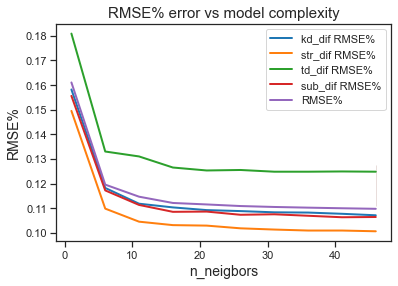

In [16]:
min_rmse = np.min(traindf['rmse'])
opt_n = np.min(traindf['neighbors'][traindf.rmse == min_rmse])

for stat in ['kd','str','td','sub']:
    g = sns.lineplot(data=traindf, y=stat + '_dif_rmse', x='neighbors', label=stat + '_dif RMSE%')
    
g = sns.lineplot(data=traindf, y='rmse', x='neighbors', label='RMSE%') 
g = sns.lineplot(y=traindf['rmse'], x= opt_n) 

g.set_title('RMSE% error vs model complexity', fontsize=15)
g.set_xlabel('n_neigbors', fontsize=14)
g.set_ylabel('RMSE%', fontsize=14)
g.legend()

print('Best Tuned Model(=min neighbors + min average_rmse error):')
best_model = traindf[traindf.neighbors == opt_n]
best_model

best model is average model for as many neighbors as possible, but it doesnt get a lot better after 6 neighbors,
so im choosing simple n=6 model to work with

In [17]:
n = np.min(best_model['neighbors'])
knn_reg = set_knn_reg(X_columns=X_columns, y_columns=y_columns, data=fdf, n=n)
fdf = set_predictions(model=knn_reg, data=fdf, X_columns=X_columns, y_columns=y_columns)
knn_reg

KNeighborsRegressor(algorithm='ball_tree', n_neighbors=46)

### <span style='color:green'> **[done]** </span> Model evaluation (=Test_set score):

In [18]:
testdf = pd.DataFrame(columns=['neighbors','rmse','kd_dif_rmse','str_dif_rmse','td_dif_rmse','sub_dif_rmse'])

for stat in y_columns:
    testdf.loc[index, 'neighbors'] = n
    y_test_act = fdf[stat][fdf.set=='test']
    y_test_pred = fdf[stat+'_pred'][fdf.set=='test']
    testdf.loc[index, stat+'_rmse'] = get_rmse(act=y_test_act, pred=y_test_pred)

testdf.loc[index,'rmse'] = 0.25 * (testdf.loc[index,'kd_dif_rmse'] + testdf.loc[index,'str_dif_rmse'] + testdf.loc[index,'td_dif_rmse'] + testdf.loc[index,'sub_dif_rmse'])
    
print('RMSE% for fight stat:')
testdf

RMSE% for fight stat:


,neighbors,rmse,kd_dif_rmse,str_dif_rmse,td_dif_rmse,sub_dif_rmse
9,46,0.0861,0.0838,0.0809,0.11,0.0697


### <span style='color:green'> **[done]** </span> Opt Model view:

<AxesSubplot:xlabel='sub_dif', ylabel='Density'>

<Figure size 864x1080 with 0 Axes>

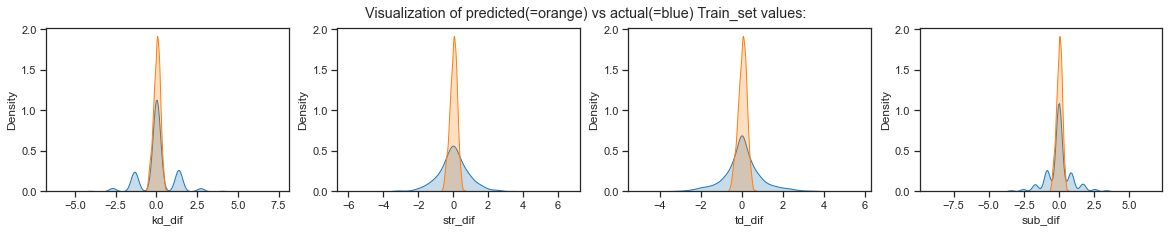

In [19]:
rows=1
cols=4
data = fdf[fdf.set == 'test']
plt.figure(figsize = (12,15))
fig, axs = plt.subplots(rows,cols,figsize = (20,3))
fig.suptitle('Visualization of predicted(=orange) vs actual(=blue) Train_set values:')

sns.kdeplot(ax=axs[0],x=data['kd_dif'],fill=True)
sns.kdeplot(ax=axs[0],x=data['kd_dif_pred'],fill=True)

sns.kdeplot(ax=axs[1],x=data['str_dif'],fill=True)
sns.kdeplot(ax=axs[1],x=data['str_dif_pred'],fill=True)

sns.kdeplot(ax=axs[2],x=data['td_dif'],fill=True)
sns.kdeplot(ax=axs[2],x=data['td_dif_pred'],fill=True)

sns.kdeplot(ax=axs[3],x=data['sub_dif'],fill=True)
sns.kdeplot(ax=axs[3],x=data['sub_dif_pred'],fill=True)

we can see that model predicting the average stat produce the best model (= the features is not very strong predictors)

### <span style='color:green'> **[done]** </span> Predicting Fight outcome (=win/lose):

In [20]:
X_columns = list(df.columns[18:len(df.columns)])
fight_stats = ['kd_dif','str_dif','td_dif','sub_dif']
X_columns.extend(fight_stats)
y_columns = 'result'
print(X_columns)
print(y_columns)

['stance_win_ratio', 'win_perc_dif', 'win_strk_dif', 'lose_strk_dif', 'kd_dif', 'str_dif', 'td_dif', 'sub_dif']
result


In [21]:
pdf = (df[X_columns]).copy()
pdf[y_columns] = df[y_columns]
pdf = (pdf.dropna()).reset_index(drop=True)
pdf.tail(3)

,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,kd_dif,str_dif,td_dif,sub_dif,result
6487,-0.160261,-2.063384,-0.575708,2.156259,-0.000995,0.126491,-1.597572,-0.013366,lose
6488,2.207079,-0.016271,-0.004540,-1.072901,-0.000995,-0.174504,1.558550,-0.013366,win
6489,1.461511,0.111674,-0.004540,-2.149288,1.351338,0.126491,-0.019511,-0.013366,win


## <span style='color:green'> **[done]** </span> Train Random Forest model:

In [22]:
pdf = set_train_test(X_columns=X_columns, y_columns='result', data=pdf, test_size=0.3, valid_size=0.1)
forest_clf = set_forest_clf(X_columns=X_columns, y_columns='result', data=pdf,tree_depth=2, n_estimators=100 )
pdf = set_predictions(model=forest_clf, data=pdf, X_columns=X_columns, y_columns=[y_columns])
print('Score: ' + str(get_accuracy(act=pdf['result'], pred=pdf['result_pred'])))
forest_clf

Data split: Data=(6490, 10), train_set=(4130, 8), validation_set=(470, 8), test_set=(1890, 8)
Score: 0.82557781201849


RandomForestClassifier(max_depth=2, random_state=0)

## <span style='color:green'> **[done]** </span> Tune model parameters:

In [23]:
traindf = pd.DataFrame(columns=['n_trees','accuracy'])
pdf = set_train_test(X_columns=X_columns, y_columns=y_columns, data=pdf, test_size=0.3, valid_size=0.2)

for n in range(1,200,1):

    index = len(traindf)
    traindf.loc[index, 'n_trees'] = n
    
    forest_clf = set_forest_clf(X_columns=X_columns, y_columns=y_columns, data=pdf, n_estimators=n, tree_depth=len(X_columns))
    pdf = set_predictions(model=forest_clf, data=pdf, X_columns=X_columns, y_columns=[y_columns])
    
    y_val_act = pdf['result'][pdf.set=='validation']
    y_val_pred = pdf['result_pred'][pdf.set=='validation']

    traindf.loc[index, 'accuracy'] = get_accuracy(act=y_val_act, pred=y_val_pred)
    
traindf

Data split: Data=(6490, 11), train_set=(3549, 8), validation_set=(964, 8), test_set=(1977, 8)


,n_trees,accuracy
0,1,0.8361
1,2,0.832988
2,3,0.8361
3,4,0.84751
4,5,0.84751
...,...,...
194,195,0.866183
195,196,0.868257
196,197,0.86722
197,198,0.868257


Best Parameters:


,n_trees,accuracy
0,194,0.870332


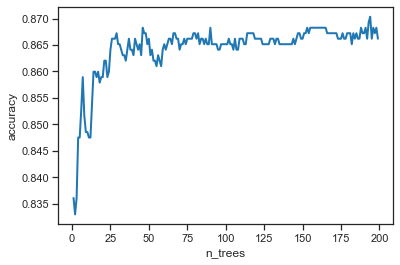

In [24]:
print('Best Parameters:')
best_acc = traindf.accuracy.max()
t = traindf[traindf.accuracy == best_acc]
t = t[t.n_trees == t.n_trees.min()].reset_index(drop=True)
sns.lineplot(y='accuracy', x='n_trees', data=traindf)
t.head()

In [25]:
n_trees = np.min(t.n_trees)
pdf = set_train_test(X_columns=X_columns, y_columns='result', data=pdf, test_size=0.3, valid_size=0.1)
forest_clf = set_forest_clf(X_columns=X_columns, y_columns='result', data=pdf, n_estimators=n_trees, tree_depth=len(X_columns))
pdf = set_predictions(model=forest_clf, data=pdf, X_columns=X_columns, y_columns=[y_columns])
print('Accuracy: ' + str(get_accuracy(act=pdf['result'][pdf.set=='test'], pred=pdf['result_pred'][pdf.set=='test'])))
forest_clf

Data split: Data=(6490, 11), train_set=(4038, 8), validation_set=(466, 8), test_set=(1986, 8)
Accuracy: 0.8575025176233635


RandomForestClassifier(max_depth=8, n_estimators=194, random_state=0)

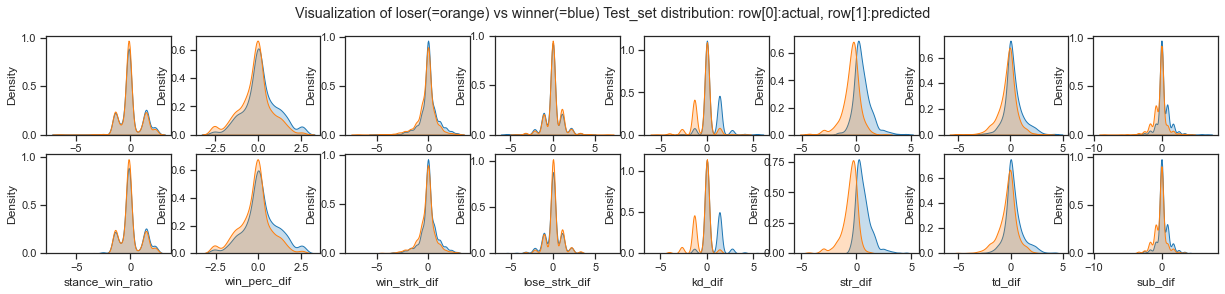

In [26]:
rows=2
cols=len(X_columns)
data = pdf[pdf.set == 'test']
fig, axs = plt.subplots(rows,cols,figsize = (21,4))
fig.suptitle('Visualization of loser(=orange) vs winner(=blue) Test_set distribution: row[0]:actual, row[1]:predicted')

for feature,col in zip(X_columns,range(0,cols)):
    sns.kdeplot(ax=axs[0,col],x=data[feature][data.result == 'win'], fill=True)
    sns.kdeplot(ax=axs[0,col],x=data[feature][data.result == 'lose'], fill=True)
    sns.kdeplot(ax=axs[1,col],x=data[feature][data.result_pred == 'win'], fill=True)
    sns.kdeplot(ax=axs[1,col],x=data[feature][data.result_pred == 'lose'], fill=True)


## <span style='color:green'> **[done]** </span> Model evaluation (=Test_set score):

Accuracy = 0.857503


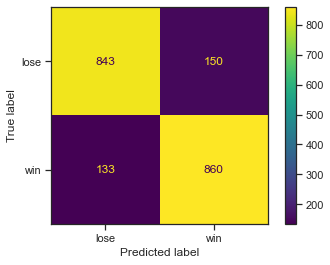

In [27]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_test_act = pdf['result'][pdf.set=='test']
y_test_pred = pdf['result_pred'][pdf.set=='test']

print('Accuracy = %.6f' % accuracy_score(y_test_act,y_test_pred))
ConfusionMatrixDisplay.from_predictions(y_test_act,y_test_pred)  

In [28]:
pdf.to_csv('../data/ufc_data_trained.csv')